In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
avengers = pd.read_csv('avengers.csv')
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [3]:
avengers.shape

(173, 21)

In [4]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

### Remove Avengers before 1960s

In [5]:
true_avengers = avengers.loc[avengers.Year >= 1960]
true_avengers.Year.unique()

array([1963, 1964, 1965, 1967, 1968, 1969, 1973, 1976, 1975, 1978, 1979,
       1988, 1981, 1982, 1983, 1984, 1993, 1986, 1987, 1989, 1991, 1992,
       1985, 2003, 2005, 2007, 2009, 1990, 1996, 1998, 2000, 2001, 2004,
       2006, 2008, 2010, 2011, 2012, 2013, 2015, 2014])

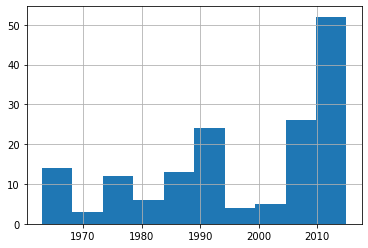

In [6]:
true_avengers.Year.hist()

### Total number of deaths each character experienced

In [7]:
death_cols = [col for col in true_avengers.columns if col.startswith('Death')]
death_cols

['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

In [8]:
avengers.columns[avengers.isnull().sum() > 0]

Index(['Name/Alias', 'Probationary Introl', 'Full/Reserve Avengers Intro',
       'Return1', 'Death2', 'Return2', 'Death3', 'Return3', 'Death4',
       'Return4', 'Death5', 'Return5', 'Notes'],
      dtype='object')

In [9]:
for col in death_cols:
    print(true_avengers[col].value_counts(dropna=False))

NO     91
YES    68
Name: Death1, dtype: int64
NaN    143
YES     16
Name: Death2, dtype: int64
NaN    157
YES      2
Name: Death3, dtype: int64
NaN    158
YES      1
Name: Death4, dtype: int64
NaN    158
YES      1
Name: Death5, dtype: int64


In [10]:
pd.Series([1,2, np.nan]).sum()

3.0

In [11]:
# mask NO and NaN with 0, YES with 1
death_df = true_avengers[death_cols].copy()
for col in death_cols:
    death_df[col+'_num'] = death_df[col].mask(death_df[col] != 'YES', 0).mask(
    death_df[col] == 'YES', 1)  
    death_df[col+'_num'] = death_df[col+'_num'].astype('int64')

In [12]:
count_cols = [col for col in death_df.columns if col.endswith('_num')]
count_cols

['Death1_num', 'Death2_num', 'Death3_num', 'Death4_num', 'Death5_num']

In [13]:
death_df['Deaths'] = death_df[count_cols].sum(axis = 1)
death_df['Deaths']

0      1
1      1
2      1
3      1
4      2
      ..
168    0
169    0
170    0
171    0
172    0
Name: Deaths, Length: 159, dtype: int64

In [14]:
true_avengers['Deaths'] = death_df.Deaths
true_avengers['Deaths'].value_counts()

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    91
1    52
2    14
5     1
3     1
Name: Deaths, dtype: int64

In [16]:
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    
    return num_deaths

#true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis = 1)

### Verify that the Years since joining field accurately reflects the Year column

In [19]:
true_avengers[['Years since joining', 'Year']].head()

,Years since joining,Year
0,52,1963
1,52,1963
2,52,1963
3,52,1963
4,52,1963


In [27]:
joined_accuracy_count = ((2015 - true_avengers.Year) == true_avengers['Years since joining']).sum()

In [26]:
true_avengers.shape

(159, 22)

# Star Wars Survey